# MiniBatch KMeans Clustering Example

In [1]:
## Importing Libraries

from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
## Loading Dataset

# Load the Iris dataset (use y lables for verifying the results)
iris_X, iris_y = load_iris(return_X_y=True)

In [3]:
## Model Building

# Create MiniBatch KMeans object
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, 
                                   random_state=0,
                                   batch_size=2048)

# Fit clustering and return the cluster lables for dataset
clusters = minibatch_kmeans.fit_predict(iris_X)

# Get cluster labels for each data points in dataset
labels = minibatch_kmeans.labels_

# Get cluster centres
centers = minibatch_kmeans.cluster_centers_

## Elbow Method for finding the optimal value of k

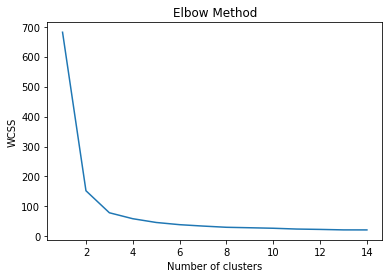

In [4]:
# wcss - Within Cluster Sum of Squares (WCSS)
wcss = []

for i in range(1, 15):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=i, 
                                       init='k-means++', 
                                       max_iter=300, 
                                       n_init=10, 
                                       random_state=0,
                                       batch_size=2048)
    minibatch_kmeans.fit(iris_X)
    wcss.append(minibatch_kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Finding the appropriate number of cluters(k) - Using silhouette coefficient

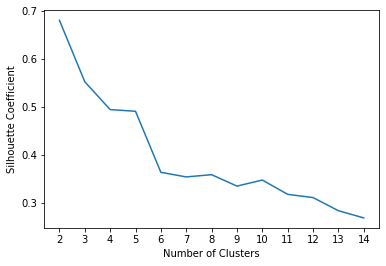

In [5]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, 
                                       init='k-means++', 
                                       max_iter=300, 
                                       n_init=10, 
                                       random_state=0,
                                       batch_size=2048)
    
    minibatch_kmeans.fit(iris_X)
    score = silhouette_score(iris_X, minibatch_kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Mini Batch KMeans Clustering object with default parameter values- detailed

"""
minibatch_kmeans = MiniBatchKMeans(n_clusters=8, 
                                    init='k-means++', 
                                    max_iter=100, 
                                    batch_size=1024, 
                                    verbose=0, 
                                    compute_labels=True, 
                                    random_state=None, 
                                    tol=0.0, 
                                    max_no_improvement=10, 
                                    init_size=None, 
                                    n_init=3, 
                                    reassignment_ratio=0.01)

"""